In [1]:
%matplotlib inline

import re
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading logs generated from WhyLogs CLI

Running WhyLogs will produce the following four files:
1. A flat summary file;
2. A histograms file;
3. A frequency file; and
4. A binary file containing the raw data objects

We'll first explore the generated files produced from the command line interface. We can explore the generated files by downloading and reading into Pandas as dataframes.

In [2]:
# TODO: Generate cell
# GENERATED CELL, assumes files have expected names directly inside of stated directory
summary_dir = "" ###SUMMARY_DIR###
data_dir = "" ###DATA_DIR###
data_file = "lending_club_1000.csv" ##DATA_FILE###

WhyLogs calculates and displays a number of metrics for the data that passes through. The carefully chosen metrics balance efficient storage and in-depth analysis of your data.

In [ ]:
# TODO: After generated cell, must confirm with Andy's CLI experience
flat_summary = pd.read_csv(os.path.join(summary_dir, ""))
flat_summary

The flat summary file contains a summary of each variable of the dataset that has metrics specifically for numeric, text, and categorical variables. The inferred variable types themselves can tell us a lot about errors that may occur in the process.

For example, in the packaged loan dataset, the *mths_since_last_record* variable has 74% of records in the majority variable type. We can see further detail with the type count variables that we'll view below.

First, we'll need to pull a particular variable's row from the summary data. We'll then display a few metrics related to data types.

Percentage of data in inferred data type: [1.]


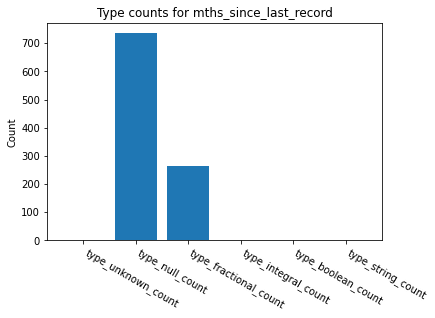

In [12]:
# List all type count metrics
regex = re.compile("type_(.*)_count")
metrics = list(filter(regex.match, flat_summary.columns))

# TODO: May elect to choose a random row of the data and grab the column name
# Filter to the desired variable
variable = "mths_since_last_record"
data = flat_summary[flat_summary["column"]==variable]

# Print data type percentage
print("Percentage of data in inferred data type:", data["inferred_dtype"].values)

# Display all type count metrics
x = [i for i, _ in enumerate(metrics)]
fig, ax = plt.subplots()
plt.bar(x, np.squeeze(data[metrics].values))
plt.title("Type counts for "+variable)
plt.ylabel("Count")
plt.xticks(x, metrics)
plt.setp(ax.get_xticklabels(), rotation=-30, horizontalalignment='left')
plt.show()

In addition to the type metrics, there are loads of other useful metrics in the WhyLogs summaries. These include but are not limited to descriptive statistics, estimations with error intervals, and metrics related to missing values.

The histogram file contains information for numeric variables that allow us to create histograms and analyze distribution.

We'll grab the data for the *fico_range_high* variable and plot it using `matplotlib`.

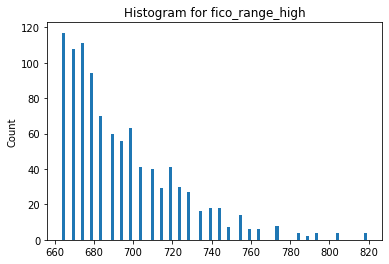

In [13]:
# TODO:
#histograms = pd.read_csv(os.path.join(summary_dir, ""))

# See one of the inspected histograms
variable = "fico_range_high"
bins = histograms[variable]['bin_edges']
n = histograms[variable]['counts']
bin_width = np.diff(bins)

plt.bar(bins[0:-1], n, bin_width, align='edge')
plt.title("Histogram for "+variable)
plt.ylabel("Count")
plt.show()

Finally, we have more detailed information on the frequencies of many variables in the dataset. These can be accessed through the generated frequencies file.

In [ ]:
frequencies = pd.read_csv(os.path.join(summary_dir, ""))

# Generating logs from WhyLogs Python library

These same files can also be produced with the `whylabs` Python library along with tools to display these as logs to external files, such as `stdout`.

To do so, we will import the WhyLogs library, initialize a logging session with WhyLogs, read our raw data, and pass this data to our session.

In [3]:
from whylabs.logs import get_or_create_session, get_logger

In [4]:
session = get_or_create_session(output_to_disk=True)

In [5]:
logger = get_logger()

In [6]:
data = pd.read_csv(os.path.join(data_dir, data_file))
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,90671227,NaN,4800.0,4800.0,4800.0,36 months,13.49,162.87,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,90060135,NaN,21600.0,21600.0,21600.0,60 months,9.49,453.54,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,90501423,NaN,24200.0,24200.0,24200.0,36 months,9.49,775.09,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,90186302,NaN,3600.0,3600.0,3600.0,36 months,11.49,118.70,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,90805192,NaN,8000.0,8000.0,8000.0,36 months,10.49,259.99,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
996,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
997,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
998,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have the raw data, we can pass it into the WhyLogs logger. We can pass a label "test.data" along with the dataset for future reference.

When we capture the logger response, we can interact with the generated profiles.

In [7]:
response = logger.log_dataframe(data, 'test.data')
profile = response['profile']
summary = profile.flat_summary()

The flat summary, histograms, and frequency information can be found inside this summary object.

In [8]:
flat_summary = summary['summary']
flat_summary

,column,count,null_count,bool_count,numeric_count,max,mean,min,stddev,nunique_numbers,...,ununique_str_upper,quantile_0.0000,quantile_0.0100,quantile_0.0500,quantile_0.2500,quantile_0.5000,quantile_0.7500,quantile_0.9500,quantile_0.9900,quantile_1.0000
0,num_sats,1000.0,0.0,0.0,998.0,44.0,12.381764,2.0,6.104370,37.0,...,0.0,2.0,3.0,5.0,8.0,11.0,15.0,25.0,33.0,44.0
1,total_il_high_credit_limit,1000.0,0.0,0.0,998.0,914599.0,46875.054108,0.0,51025.948360,883.0,...,0.0,0.0,0.0,0.0,17534.0,33971.0,61643.0,129934.0,214649.0,914599.0
2,tax_liens,1000.0,0.0,0.0,998.0,7.0,0.126253,0.0,0.541268,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0
3,pub_rec,1000.0,0.0,0.0,998.0,9.0,0.365731,0.0,0.793345,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,9.0
4,delinq_amnt,1000.0,0.0,0.0,998.0,65000.0,69.131263,0.0,2058.823541,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,mths_since_last_record,1000.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,sec_app_revol_util,1000.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,mths_since_recent_bc,1000.0,0.0,0.0,990.0,203.0,21.335354,0.0,27.980144,114.0,...,0.0,0.0,0.0,1.0,5.0,12.0,25.0,75.0,142.0,203.0
149,pub_rec_bankruptcies,1000.0,0.0,0.0,998.0,8.0,0.185371,0.0,0.491356,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0


In [9]:
histograms = summary['hist']
histograms

{'num_sats': {'bin_edges': [2.0,
   2.420000044,
   2.840000088,
   3.260000132,
   3.680000176,
   4.10000022,
   4.520000264,
   4.940000308,
   5.360000352,
   5.780000396,
   6.20000044,
   6.620000484,
   7.040000528,
   7.460000572,
   7.880000616,
   8.30000066,
   8.720000704,
   9.140000748,
   9.560000792,
   9.980000836,
   10.40000088,
   10.820000924,
   11.240000968,
   11.660001012,
   12.080001056,
   12.5000011,
   12.920001144,
   13.340001188,
   13.760001232,
   14.180001276,
   14.60000132,
   15.020001364,
   15.440001408,
   15.860001452,
   16.280001496,
   16.700001540000002,
   17.120001584,
   17.540001628,
   17.960001672,
   18.380001716000002,
   18.80000176,
   19.220001804,
   19.640001848,
   20.060001892000002,
   20.480001936,
   20.90000198,
   21.320002024,
   21.740002068000003,
   22.160002112,
   22.580002156,
   23.0000022,
   23.420002244000003,
   23.840002288,
   24.260002332,
   24.680002376,
   25.100002420000003,
   25.520002464,
   25.940

In [10]:
frequencies = summary['frequent_strings']
frequencies.update(summary['frequent_numbers'])
frequencies

{'title': {'value': [], 'count': []},
 'disbursement_method': {'value': [], 'count': []},
 'verification_status': {'value': [], 'count': []},
 'issue_d': {'value': [], 'count': []},
 'initial_list_status': {'value': [], 'count': []},
 'purpose': {'value': [], 'count': []},
 'sub_grade': {'value': [], 'count': []},
 'hardship_flag': {'value': [], 'count': []},
 'home_ownership': {'value': [], 'count': []},
 'debt_settlement_flag': {'value': [], 'count': []},
 'addr_state': {'value': [], 'count': []},
 'grade': {'value': [], 'count': []},
 'application_type': {'value': [], 'count': []},
 'last_pymnt_d': {'value': [], 'count': []},
 'emp_length': {'value': [], 'count': []},
 'pymnt_plan': {'value': [], 'count': []},
 'term': {'value': [], 'count': []},
 'loan_status': {'value': [], 'count': []},
 'last_credit_pull_d': {'value': [], 'count': []},
 'num_sats': {'value': [9.0,
   8.0,
   11.0,
   7.0,
   10.0,
   12.0,
   6.0,
   13.0,
   14.0,
   17.0,
   5.0,
   15.0,
   16.0,
   20.0,
   

In [11]:
summary.keys()

dict_keys(['summary', 'hist', 'frequent_strings', 'frequent_numbers'])

## Additional options for our WhyLogs session
We chose the most simple configuration above, but there are a number of convenient options that can be set.

**Cloud storage:** You may set the an AWS S3 bucket to have these logs automatically pushed to the cloud. You must have valid AWS configuration settings to be able to do so.

**Binary file:** By default, we produce a binary file that contains raw objects used to summarize the data passed in. Navigating this file is beyond the scope of this notebook, however. This is listed under the *output_protobuf* option.

**Flat and JSON summaries:** By default, we produce a flat summary in the CSV format along with histogram and frequency summaries in the JSON format.

You can see these configuration options and others paired with the session in the `session.config` object.

In [14]:
session.config

<EnvConfig>
{
  "bucket": null,
  "cloud_output_folder": null,
  "disable_output": false,
  "level": "debug",
  "local_output_folder": "./whylogs",
  "output_flat_summary": true,
  "output_json_summary": true,
  "output_protobuf": true,
  "output_to_cloud": false,
  "output_to_disk": true,
  "output_to_stdout": false,
  "pipeline": null,
  "project": null,
  "team": null,
  "user": null
}

## Display and resetting the session

There is also a convenience function to send the internal Python logs to stdout.

\#TODO Does this replicate the `output_to_stdout` functionality for the session.

In [ ]:
from whylabs.logs import display_logging
display_logging('debug')

When you are done with your session, run the `reset_session` function.

In [15]:
from whylabs.logs.app.session import reset_session
reset_session()